# Analyze data from TIA2

Add more details about the test conditions here

Calculate the following:
- Calculate the offset noise level
- Calculate the FFT
- Calculate the amount of charge measured (TBD)


In [148]:
import numpy as np
import matplotlib.pyplot as plt
import os
from io import StringIO
from scipy.signal import find_peaks
import pathlib
from PyQt5.QtWidgets import QFileDialog, QInputDialog, QMessageBox

%gui qt

In [234]:
#read all files and append them together

root_dir = str('C:/Users/mchoq/Documents/Projects/Viken/Measurements/110320 - TIA V1 and V2')
print("Root dir is: ",root_dir)

filename, filters = QFileDialog.getOpenFileName(None, 
                               "Select a file to open",
                               root_dir,
                               ("csv files (*.csv)"))

print("Reading {}".format(filename))

assert os.path.exists(filename), "{} not found!".format(filename)

#search first and last lines with 4001 data points
first = 0
end = 0


with open(filename, 'r') as f:
    for i, line in enumerate(f):
        #print(i,line)
        if first == 0 and len(line.split(',')) == 4000:
            first = i
            datafromfile = line
        if len(line.split(',')) == 4000:
            end = i
            datafromfile+=line

print("First {} End {}".format(first, end))   



# read data from file
rawdata = np.genfromtxt(StringIO(datafromfile.replace('"','')), 
                        delimiter = ',', 
                        dtype = 'int',
                        skip_header = first + 1, 
                        deletechars = '"',
                        usecols = range(4000), 
                        max_rows = end - first)

ch, nbsample= rawdata.shape
print("Reading {} channels of {} samples of type {}".format(ch, nbsample, rawdata.dtype))



Root dir is:  C:/Users/mchoq/Documents/Projects/Viken/Measurements/110320 - TIA V1 and V2
Reading C:/Users/mchoq/Documents/Projects/Viken/Measurements/111820 - Adrian Measurements/ScanNumber41_negative[1].csv
First 10 End 329
Reading 310 channels of 4000 samples of type int32


In [235]:
fig = plt.Figure(figsize = (8,8))



array([[-126, -205, -229, ..., -221, -226, -243],
       [-245, -214, -201, ..., -179, -177, -210],
       [-184, -235, -226, ..., -221, -222, -246],
       ...,
       [-180, -152, -213, ..., -231, -231, -269],
       [-245, -254, -230, ..., -214, -195, -214],
       [-195, -146, -176, ..., -228, -182, -238]])

In [236]:

f=200000 # Hz
t=np.arange(0,nbsample)/f * 1000 # time in ms
t

array([0.0000e+00, 5.0000e-03, 1.0000e-02, ..., 1.9985e+01, 1.9990e+01,
       1.9995e+01])

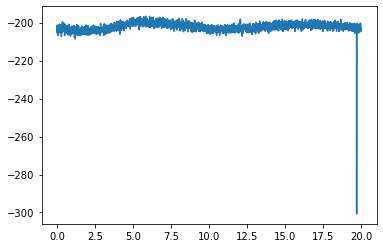

In [237]:
#plot the average spectra
pulse_avg= rawdata.mean(axis=0)
plt.plot(t,pulse_avg)

Text(0, 0.5, 'Mean ADC output (counts)')

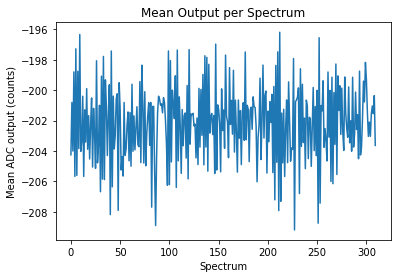

In [238]:
# calculate mean value per channel

mean_t= rawdata.mean(axis=1)
plt.plot(mean_t)
plt.title("Mean Output per Spectrum")
plt.xlabel("Spectrum")
plt.ylabel("Mean ADC output (counts)")

(0.0, 50.0)

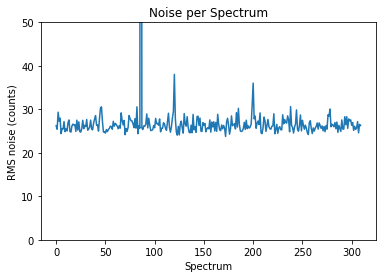

In [246]:
# calculate noise value per channel

noise_t= rawdata.std(axis=1)
plt.plot(noise_t)
plt.title("Noise per Spectrum")
plt.xlabel("Spectrum")
plt.ylabel("RMS noise (counts)")
plt.ylim(0,50)

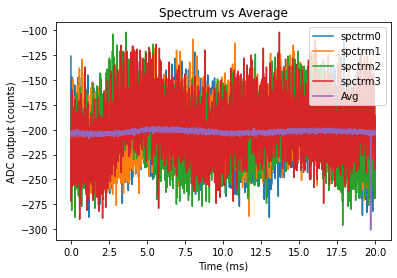

In [240]:
plt.plot(t,rawdata[0:4].T)
plt.plot(t,pulse_avg)
plt.title("Spectrum vs Average")
plt.xlabel("Time (ms)")
plt.ylabel("ADC output (counts)")
plt.legend(np.append(["spctrm"+str(i) for i in range(4)],'Avg'), loc = 'upper right')
plt.show()

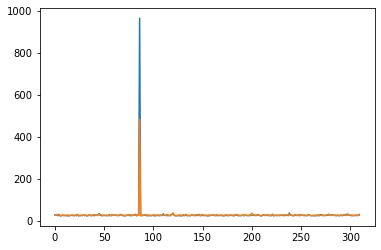

In [241]:
#calculate noise from sample 3000 to 4000
noise_e= rawdata[:,3000:4000].std(axis=1)
plt.plot(noise_e)
plt.plot(noise_t)


plt.show()


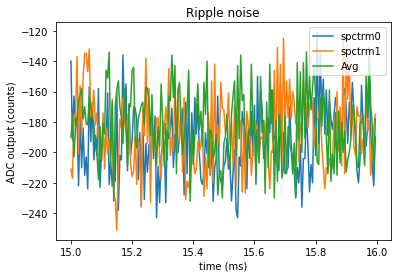

In [242]:
# check ripple
st=3000
end=st+200
plt.plot(t[st:end],rawdata[0:3,st:end].T)
plt.title("Ripple noise")
plt.xlabel("time (ms)")
plt.ylabel("ADC output (counts)")
plt.legend(np.append(["spctrm"+str(i) for i in range(2)],'Avg'), loc = 'upper right')


(310, 4000)
(2, 4000)
(2, 2000)
(2000,)
(100.0, 5.119636926359651)
(350.0, 1.7897988583627353)
(4700.0, 5.199321860802872)
(9350.0, 2.217741434553556)
(26350.0, 1.659881722355733)
(33700.0, 4.096871666110365)
(38550.0, 3.591794911657683)
(67350.0, 1.6656776750210462)
(88300.0, 1.9626728876126187)
(92950.0, 4.886802275047371)
(97650.0, 4.279136984488381)
(98450.0, 2.296828045169373)


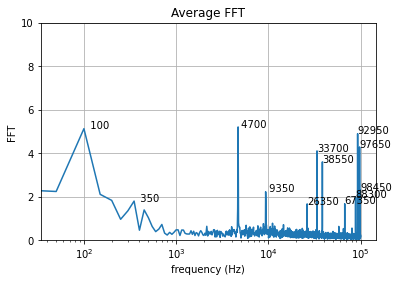

In [243]:
#calculating spectrum for each sample

print(rawdata.shape)
fftspectrum= np.fft.fft(rawdata[0:2])/nbsample
print(fftspectrum.shape)
fftspectrum= abs(fftspectrum[:,range(nbsample//2)])
print(fftspectrum.shape)


tpCount     = nbsample
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/f
frequencies = values/timePeriod
print(frequencies.shape)


plt.plot(frequencies,fftspectrum.mean(axis=0))
plt.xscale('log')
plt.ylim((0,10))
plt.xlabel('frequency (Hz)')
plt.ylabel('FFT')
plt.title('Average FFT')

peaks, _ = find_peaks(fftspectrum.mean(axis=0), height=1.5)

for xy in zip(frequencies[peaks],fftspectrum.mean(axis=0)[peaks]):
    print(xy)
    plt.annotate('%5.0f' % xy[0], xy=xy, textcoords='data')
plt.grid()
plt.show()





In [203]:
from scipy.signal import find_peaks

#print(np.where(fftspectrum.mean(axis=0)>1.5))
frequencies[np.where(fftspectrum.mean(axis=0)>1.5)]

peaks, _ = find_peaks(fftspectrum.mean(axis=0), height=1.5)
for i in zip(frequencies[peaks],fftspectrum.mean(axis=0)[peaks]):
    print(i[0], i[1])


4700.0 5.3616500057249645
9400.0 1.9134854826727958
33700.0 2.248134256606325
38350.0 3.1546903408993687
67350.0 2.037712452274918
88300.0 1.8456923434927082
92950.0 4.664296209207651
97650.0 4.546047633900804
98450.0 2.3214852776888755


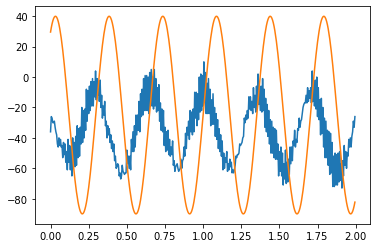

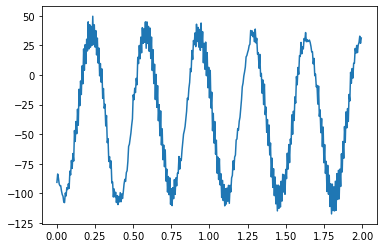

In [14]:
amplitude = 65
phase = 0.296
offset = -25
freq = 2842
st=0
end=st+400

plt.plot(t[st:end],rawdata[0,st:end])
sine = amplitude * np.sin(2*np.pi*freq*(t-phase)/1000) + offset
plt.plot(t[st:end],sine[st:end])
plt.show()
plt.plot(t[st:end],rawdata[0][st:end] - amplitude * np.sin(2*np.pi*freq*(t[st:end]-phase)/1000))



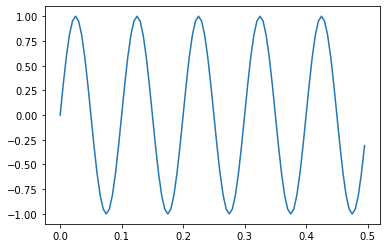

(4000,)


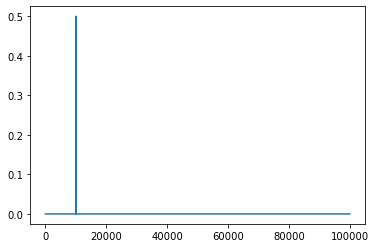

In [62]:
#calculating spectrum for a known sinewave

wavetest= np.sin(2*np.pi*10000*t/1000)
plt.plot(t[0:100],wavetest[0:100])
plt.show()

fftspectrum= np.fft.fft(wavetest)/nbsample
print(fftspectrum.shape)
fftspectrum= abs(fftspectrum[range(nbsample//2)])

tpCount     = nbsample
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/f
frequencies = values/timePeriod


plt.plot(frequencies,fftspectrum)